# Ejercicio: AD. Google Colaboratory
Asignatura: NOV22_5073 - PROGRAMACIÓN DE INTELIGENCIA ARTIFICIAL
Alumno: David Noriega Alba

Ejemplo con dataset tips.csv

In [1]:
#Instalación de las librerías necesarias para llevar a cabo la actividad, esto solamente hace falta la primera vez
#pip install sklearn
#pip install seaborn
#pip install matplotlib
#pip install pandas
#pip install numpy

In [2]:
# Importación de las clases necesarias para realizar regresión lineal simple, gráficos, tratamiento de arrays, etc.

from sklearn.linear_model import PoissonRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Obtención de los datos

In [3]:
#Se leen los datos directamente de la url facilitada en la actividad. nótese que para
#ello se está añadiendo al final de la url la propiedad raw=true para que nos lo cargue como registros

url = 'https://github.com/mwaskom/seaborn-data/blob/master/tips.csv?raw=true'
df = pd.read_csv(url)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Exploración del dataset

In [4]:
#Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) por el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
#Muestra una tupla con el número de filas, número de columnas

df.shape

(244, 7)

In [6]:
#Devuelve un DataFrame con un resumen estadístico de las columnas del DataFrame df del tipo tipo. 
#Para los datos numéricos (number) se calcula la media, la desviación típica, el mínimo, el máximo y los cuartiles. 
#Para los datos no numéricos (object) se calcula el número de valores, el número de valores distintos, la moda y su frecuencia.

df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
#Se ordenann las filas por el valor de total_bill, de mayor a menor

df.sort_values('total_bill', ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [8]:
#Se cuentan los campos nulos de cada columna
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Visualización univariante

Es decir visualización gráfica de datos que implican solamente a una columna.

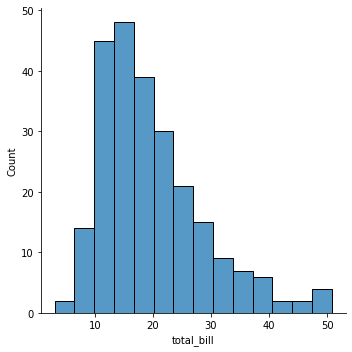

In [9]:
#Gráfica para observar la evolución de los datos de la columna total_bill utilizando Seaborn

sns.displot(df["total_bill"])

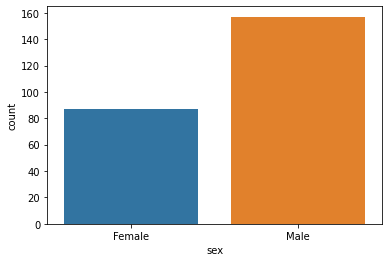

In [10]:
#Con Seaborn se cuenta el número de personas de cada sexo

sns.countplot(x="sex", data=df)

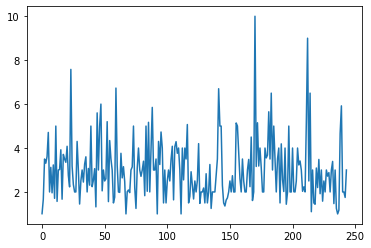

In [11]:
#Gráfica para observar la evolución de los datos de la columna tip utilizando Matplotib

df['tip'].plot()

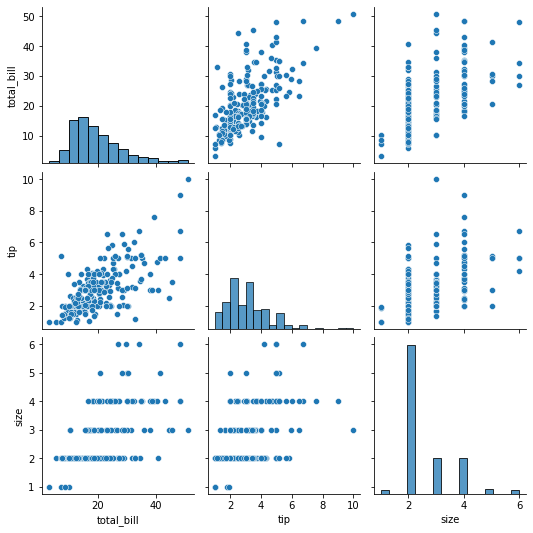

In [12]:
#Análisis del valor de todas las columnas numéricas con Seaborn

sns.pairplot(df)

# Visualización multivariante

Visualización de dos o más columnas, se hacen varios ejemplos con seaborn y con matplotlib

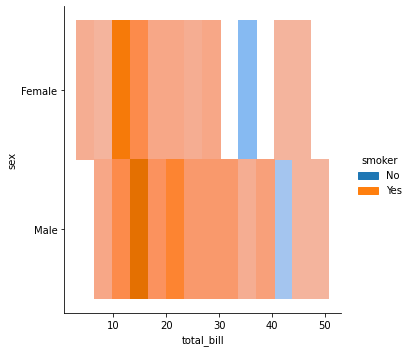

In [13]:
#Utilizando Seaborn, se distingue la cuenta total por sexos y dependiendo de si son fumadores/as o no

sns.displot(df, x="total_bill", y="sex", hue="smoker")

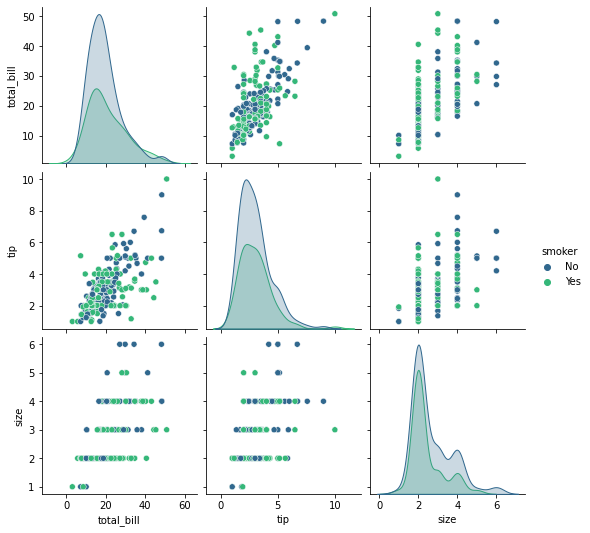

In [14]:
#Análisis del valor de todas las columnas numéricas, dependiendo de si son fumadores o no con Seaborn

sns.pairplot(df, hue="smoker", palette="viridis")

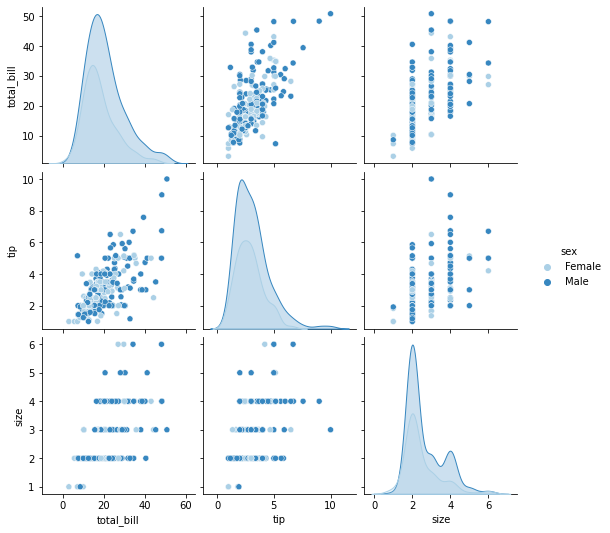

In [15]:
#Se hace lo mismo pero con el género

sns.pairplot(df, hue="sex", palette="Blues")

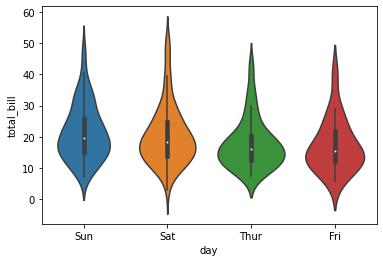

In [16]:
#Gráfico de violín para observar facturación en función del día

sns.violinplot(x="day", y="total_bill", data=df)

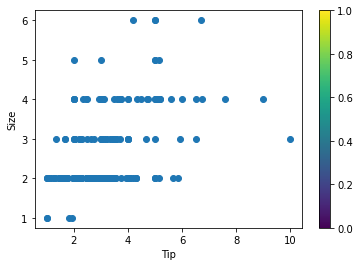

In [17]:
#Utilizando Matplotlib, se relacionan los valores de las columnas tip y Size

X = df.iloc[:, 1:2].values # tip
y = df.iloc[:, 6:7].values # time

plt.scatter(X, y, cmap='inferno')
plt.colorbar()
plt.xlabel("Tip")
plt.ylabel("Size")
plt.show()


# Modelo con sklearn para predecir el valor de la columna tip

El primer paso es identificar las columnas y crear los modelos de entrenamiento y de test.

In [18]:
#Se va a utilizar un modelo de entrenamiento, que constará en el eje x de la columna tip "propinas", mientras que en el
#eje y tendremos el valor de la columna total_bill "cuenta total"

X = pd.get_dummies(df.drop('tip', axis=1), drop_first=True)
y = df['total_bill']
X

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,0,0,0,1,0,0
1,10.34,3,1,0,0,1,0,0
2,21.01,3,1,0,0,1,0,0
3,23.68,2,1,0,0,1,0,0
4,24.59,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
239,29.03,3,1,0,1,0,0,0
240,27.18,2,0,1,1,0,0,0
241,22.67,2,1,1,1,0,0,0
242,17.82,2,1,0,1,0,0,0


In [19]:
#Se genera el dataset de entrenamiento con un tamaño de 20 registros y datos random para realizar el entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

# Entrenamiento del modelo

Se utiliza el algoritmo k-Nearest Neighbor de la librería de python sickit learn. 

Es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir, como es el caso, valores continuos; básicamente el funcionamiento de este algoritmo consta de tres patas:

1. Calcular la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.
2. Seleccionar los “k” elementos más cercanos (con menor distancia, según la función que se use)
3. Realizar una “votación de mayoría” entre los k puntos: los de una clase/etiqueta que dominen decidirán su clasificación final.

In [20]:
#En este punto se realiza el entrenamiento, se utiliza el algoritmo KNN 

#Con la primera ejecución con n_neighbors = 6 se obtuvo un resultado de 0.30 de media de error absoluto y 0.997046 de score
#Se aumentó el parámetro n_neighbors a 10 y se ha logrado optimizar el modelo, a partir de 10 neighbors,
#ya resulta contraproducente

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Finalmente, se imprimen los resultados, score es el resultado obtenido, la eficacia del modelo, y mean_absolute_error es 
#la media de error que se ha obtenido en las predicciones
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2 = {:.4f}'.format(r2))
print('MAE = {:.4f}'.format(mae))
print('RMSE = {:.4f}'.format(rmse))

R2 = 0.9977
MAE = 0.2726
RMSE = 0.3584


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f953c8b2f40>,
      dtype=object)

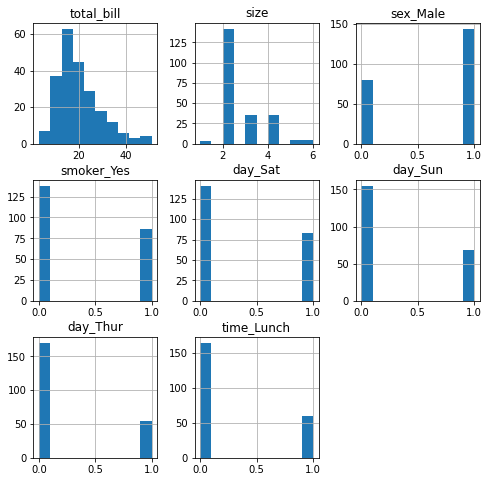

In [21]:
#Finalmente se muestra un histograma con las estadísticas obtenidas del entrenamiento, expresadas de forma gráfica

pd.DataFrame(X_train, columns=X.columns).hist(figsize=(8,8))

# Minimizar el error medio cuadrático

En las dos celdas siguientes, se minimiza el error medio cuadrático, y se lleva a gráfica, para mostrar los puntos que minimizan el error medio cuadrático.

In [22]:
# Obtención del mejor valor para el parámetro alpha
output = []
last_error = 999

for i in range(1, 101):
    iPoisson_GLM = PoissonRegressor(alpha=i, tol=1e-6)
    iPoisson_GLM.fit(X_train, y_train)
    y_pred = iPoisson_GLM.predict(X_test)
    iRMS_error = mean_squared_error(y_test, y_pred, squared=False)
    if iRMS_error < last_error: best_alpha = i
    last_error = iRMS_error
    output.append(iRMS_error)

print("RMSE is minimised at \u03B1 =", best_alpha)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


RMSE is minimised at α = 57


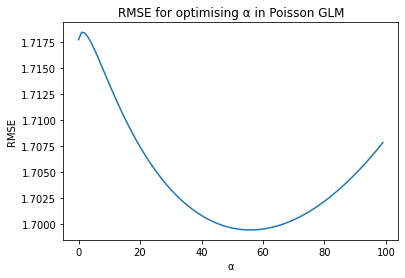

In [23]:
plt.plot(output)
plt.title('RMSE for optimising \u03B1 in Poisson GLM')
plt.xlabel('\u03B1')
plt.ylabel('RMSE')
plt.show()

# Comentarios finales

Aquí finalizaría el modelo, se han realizado las peticiones que figuran en el enunciado de la tarea, básicamente este notebook ha seguido los siguientes pasos por este orden:

1. Importación de librerías necesarias e instalación, si resulta necesario de librerías
2. Importación del dataset tips a partir de la url de su Github
3. Exploración del dataset utilizando dataframes de Pandas
4. Visualización univariante y multivariante de los datos utilizando Seaborn y Matplotlib
5. División del modelo en train y test
6. Entrenamiento del modelo
7. Evaluación y optimización del modelo para conseguir mejor score y minimizar el error medio cuadrático

Una gran parte del código se ha copiado de distintos ejemplos del repositorio compartido en clase, algunas otras soluciones han sido sacadas de Internet.